In [1]:
from scipy.io import loadmat
from nilearn import plotting, datasets
from ipywidgets import interact
from config import DEFAULT_ABIDE_LOCATION, ATLAS_NAME
import numpy as np
import matplotlib.pyplot as plt

In [3]:
root = DEFAULT_ABIDE_LOCATION
assert root.exists(), f"{root} does not exist"
indexes = sorted(list(root.glob("5*")))

print(f"{len(indexes)} subjects found in {root}")


871 subjects found in c:\Users\INES\Documents\3A_MVA\Geometric Data Analysis\sprectral_graph_convolutions\__ABIDE_dataset\ABIDE_pcp\cpac\filt_noglobal


In [4]:
# VISUALIZE TIME SERIES DATA INTERACTIVELY
def plot_signals(subject_idx=0, atlas_index=0):
    subject_path = indexes[subject_idx]
    subject_index = subject_path.name[:5]
    signal_path = list(subject_path.glob(f"*.*1D"))[0]
    assert signal_path.exists(), f"{signal_path} does not exist"
    time_series = np.loadtxt(signal_path, skiprows=0)
    plt.plot(time_series[:, :] if atlas_index==-1 else time_series[:, atlas_index], alpha=0.4 if atlas_index==-1 else 1.)
    plt.title(f"Subject #{subject_index} " + ("All HO areas " if atlas_index==-1 else f" - {ATLAS_NAME} - {atlas_index}"))
    plt.xlim(0, 200)
    plt.ylim(-300, 300)
    plt.grid(True)
    plt.show()




In [6]:
# @TODO: we miss labels from the HO atlas (111 labels used in ABIDE, 48 found in the Atlas nilearn atlas)
def plot_connectivity(subject_idx=0):
    subject_path = indexes[subject_idx]
    subject_index = subject_path.name[:5]
    con = loadmat(str(subject_path/f"{subject_index}_ho_correlation.mat"))["connectivity"]
    # print(min(con.flatten()), max(con.flatten()))
    plotting.plot_matrix(
        con,
        # labels=labels,
        # figure=(9, 7),
        figure=(6, 6),
        vmax=1,
        vmin=-1,
        title=f"Subject #{subject_index} - Connectivity matrix",
    )

# Visualize fMRI time series and connectivity
- Time series extracted at standardized locations (using the Harvard-Oxford `HO` atlas).
- As you can see, when each time serie is taken invidually, there's no coherence across patients (lack of phase synchronization, basically not the same signals or stimuli).
- In short, temporal aspect won't bring much, these curves are a mess!
- But there's coherence accross various time series for a given patient, as we'll see with the connectivity matrix.

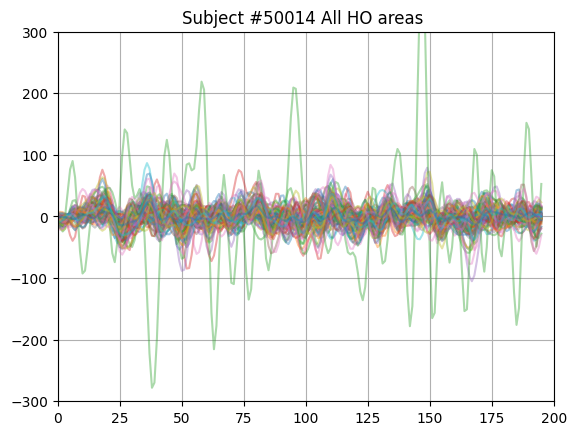

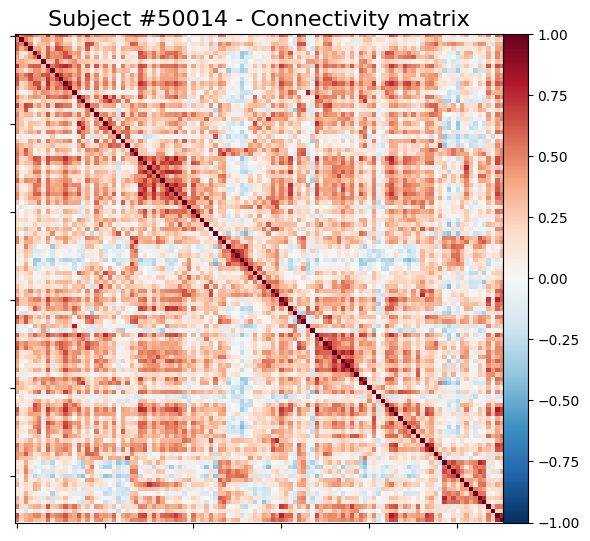

In [7]:
chosen_subject = 10
plot_signals(subject_idx=chosen_subject, atlas_index=-1);
plot_connectivity(subject_idx=chosen_subject);

# Visualize time series individually

In [8]:
# interactively plot time series
interact(plot_signals, subject_idx=(0, len(indexes)-1, 1), atlas_index=(-1, 110, 1));

interactive(children=(IntSlider(value=0, description='subject_idx', max=870), IntSlider(value=0, description='…

# Visualize connectivity matrix for each subject

In [9]:
# VISUALIZE DATA INTERACTIVELY

interact(plot_connectivity, subject_idx=(0, len(indexes)-1, 1))

interactive(children=(IntSlider(value=0, description='subject_idx', max=870), Output()), _dom_classes=('widget…

<function __main__.plot_connectivity(subject_idx=0)>

#### Visualizing the HO Atlas with `nilearn`

In [13]:
dataset_ho = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_ho_filename = dataset_ho.filename
labels = dataset_ho["labels"]
labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

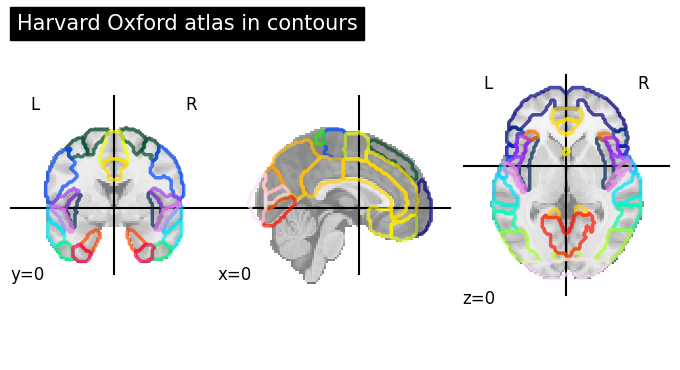

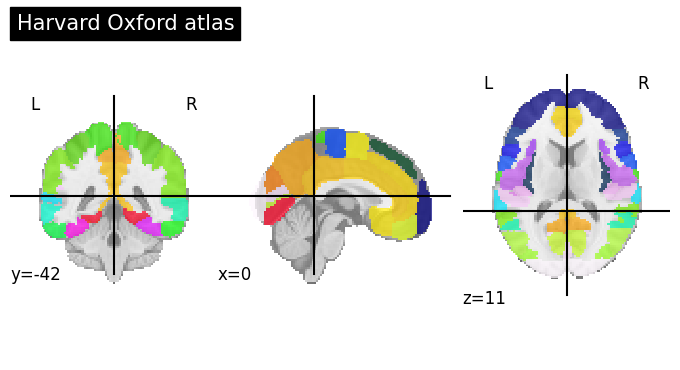

In [15]:
plotting.plot_roi(
    atlas_ho_filename,
    view_type="contours",
    title="Harvard Oxford atlas in contours",
)
plotting.show();


plotting.plot_roi(atlas_ho_filename, title="Harvard Oxford atlas");

# Make visualization for figures in report 

In [36]:
from medigraph.data.abide import AbideData 
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt
from nilearn import plotting
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import RFE
from glob import glob
import seaborn as sns



DEFAULT_ABIDE_NAME = "__ABIDE_dataset"
root_folder = Path().resolve().parent.absolute()
print('root', root_folder)
data_folder = root_folder/ DEFAULT_ABIDE_NAME
print('data', data_folder)  

path_to_figures = Path().resolve().parent / 'report' / 'figures'
print(path_to_figures)

root C:\Users\INES\Documents\3A_MVA\Geometric Data Analysis\sprectral_graph_convolutions
data C:\Users\INES\Documents\3A_MVA\Geometric Data Analysis\sprectral_graph_convolutions\__ABIDE_dataset
C:\Users\INES\Documents\3A_MVA\Geometric Data Analysis\sprectral_graph_convolutions\report\figures


### Sorted adjacency 

In [5]:
data = AbideData()
data.get_metadata()

adj = data.get_graph_adjacency()

Metadata mask: 100%|██████████| 871/871 [03:52<00:00,  3.75it/s]


In [8]:

dict = {
    'INDICES' : np.arange(adj.shape[0]),
    'UNSORTED_ID' : data.subject_indices
}
correspondance = pd.DataFrame(dict)
site_names  = data.df.SITE_ID.unique()
sorted_df = data.df.sort_values(by=["SITE_ID", "SEX"])

In [9]:
sorted_indices = []
for id in sorted_df.SUB_ID:

    if id in data.subject_indices:
        sorted_indices.append(
            correspondance.INDICES[correspondance.UNSORTED_ID == id].iloc[0]
        )

In [10]:
print(len(sorted_indices))

871


<Figure size 640x480 with 0 Axes>

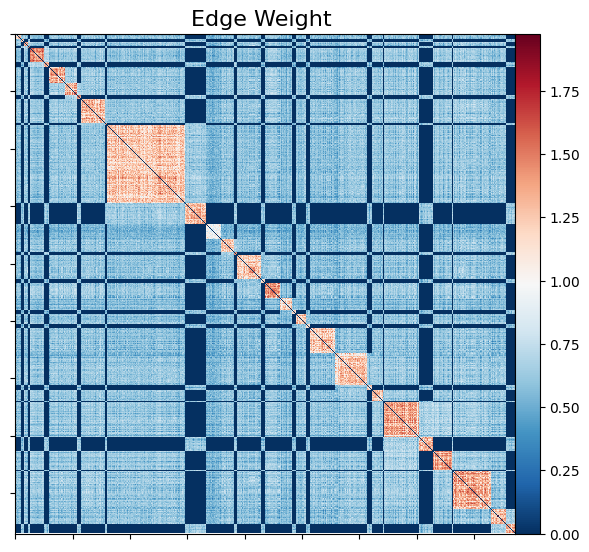

In [11]:
from nilearn import plotting
import matplotlib.pyplot as plt

fig = plt.figure()
plotting.plot_matrix(
    adj[sorted_indices][:, sorted_indices],
    figure=(6, 6),
    vmax=adj.max(),
    vmin=adj.min(),
    title=f"Edge Weight "
)

fig.savefig(path_to_figures / "sorted_adjacency_by_site_id_by_sex.png")

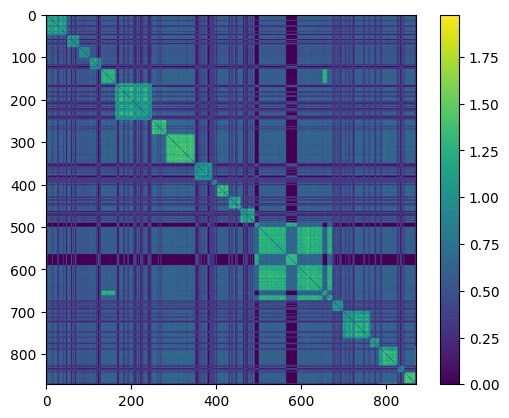

In [78]:
plt.imshow(adj)
plt.colorbar()
plt.show()

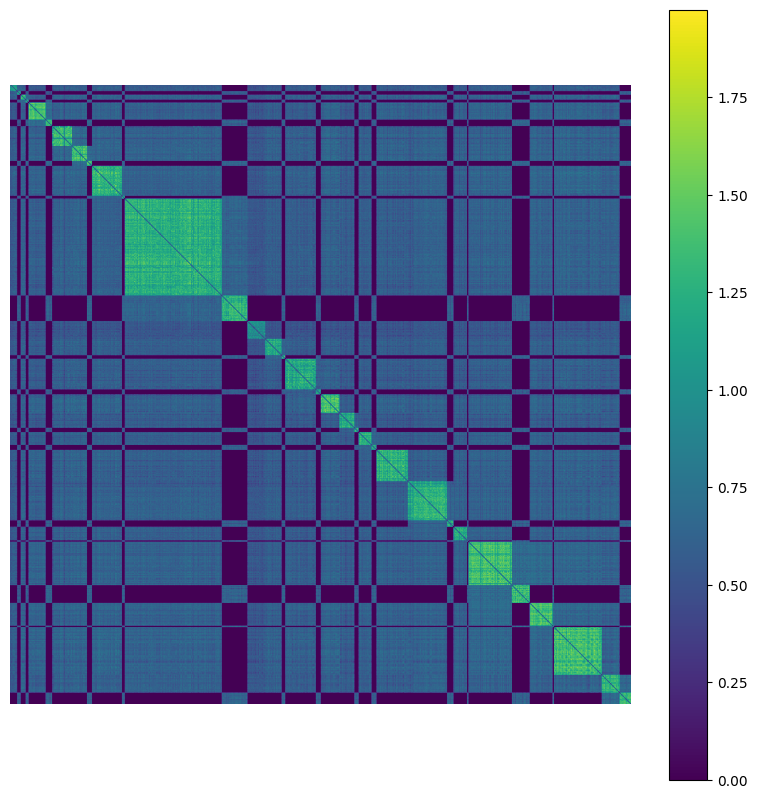

In [15]:
fig = plt.figure(figsize=fixed_size)
plt.imshow(adj[sorted_indices][:, sorted_indices])
plt.colorbar()
plt.axis("off")
plt.show()

fig.savefig(path_to_figures / "sorted_adjacency_by_site_id_by_sex.png")

### RFE Figures

In [4]:
data = AbideData()

In [5]:
X = data.get_input_feature_map()
Y = data.get_labels()
print(X.shape)
print(Y.shape)

(871, 6216)
(871,)


In [21]:
classifier = RidgeClassifier()
selector_500 = RFE(classifier, n_features_to_select=500)
selector_200 = RFE(classifier, n_features_to_select=200)

In [54]:
mask = np.random.permutation(300)
selector_500.fit(X[mask], Y[mask])
classifier_coeff_500 = selector_500.estimator_.coef_.squeeze(0)
mask_500 = selector_500.support_
print(f"Selector 500: coeff {classifier_coeff_500.shape} mask {mask_500.shape}")

Selector 500: coeff (500,) mask (6216,)


In [74]:
X_red = X[:, (~mask_500)]

In [75]:
selector_200.fit(X_red[mask], Y[mask])

classifier_coeff_200 = selector_200.estimator_.coef_.squeeze(0)
mask_200 = selector_200.support_
print(f"Selector 100: coeff {classifier_coeff_200.shape} mask {mask_200.shape}")

Selector 100: coeff (200,) mask (5716,)


In [140]:
norm_coeff_200 = np.abs(classifier_coeff_200)
selected_indices_red = np.argwhere(norm_coeff_200 > 0.35).squeeze(1)
print(selected_indices_red.shape)
coeff_red = norm_coeff_200[selected_indices_red]

(98,)


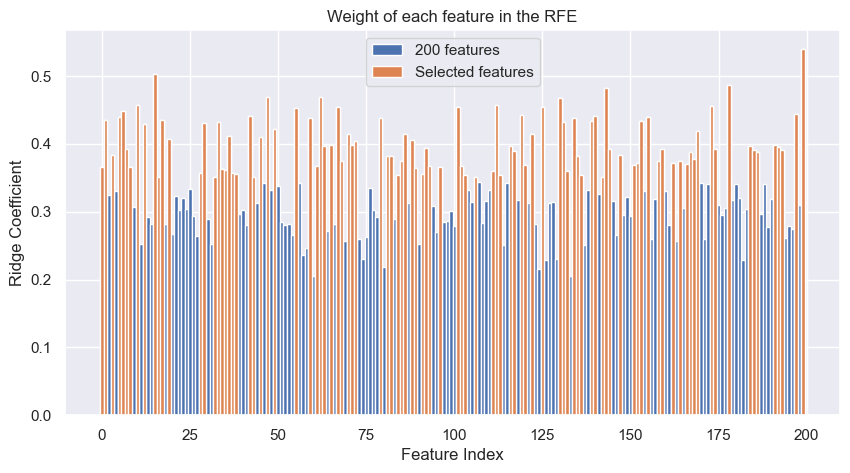

In [144]:
sns.set(context='notebook')
fig = plt.figure(figsize=(10, 5))


plt.bar(range(200), np.abs(classifier_coeff_200), width=1, label="200 features")
plt.bar(selected_indices_red, coeff_red, width=1, label="Selected features")
plt.ylabel("Ridge Coefficient")
plt.xlabel("Feature Index")
plt.legend()
plt.title("Weight of each feature in the RFE")

fig.savefig(path_to_figures / "rfe.png")

In [110]:
# Fetch the atlas
atlas_ho_filename = glob(str(data_folder)+'/*atlas*')[0]
atlas_labels_filename = glob(str(data_folder)+'/*labels*')[0]
subject_ind = 0

In [141]:
import csv 
with open(atlas_labels_filename, 'r') as f:
    reader = csv.reader(f)
    labels = list(reader)[1:]

In [127]:
labels[0] = ['0', '0']
labels = np.array(labels)[:, 1]
labels

array(['0', 'Left Thalamus', 'Left Caudate', 'Left Putamen',
       'Left Pallidum', 'Left Hippocampus', 'Left Amygdala',
       'Left Accumbens', 'Right Thalamus', 'Right Caudate',
       'Right Putamen', 'Right Pallidum', 'Right Hippocampus',
       'Right Amygdala', 'Right Accumbens', 'Right Frontal Pole',
       'Right Insular Cortex', 'Right Superior Frontal Gyrus',
       'Right Middle Frontal Gyrus',
       'Right Inferior Frontal Gyrus; pars triangularis',
       'Right Inferior Frontal Gyrus; pars opercularis',
       'Right Precentral Gyrus', 'Right Temporal Pole',
       'Right Superior Temporal Gyrus; anterior division',
       'Right Superior Temporal Gyrus; posterior division',
       'Right Middle Temporal Gyrus; anterior division',
       'Right Middle Temporal Gyrus; posterior division',
       'Right Middle Temporal Gyrus; temporooccipital part',
       'Right Inferior Temporal Gyrus; anterior division',
       'Right Inferior Temporal Gyrus; posterior division',
    

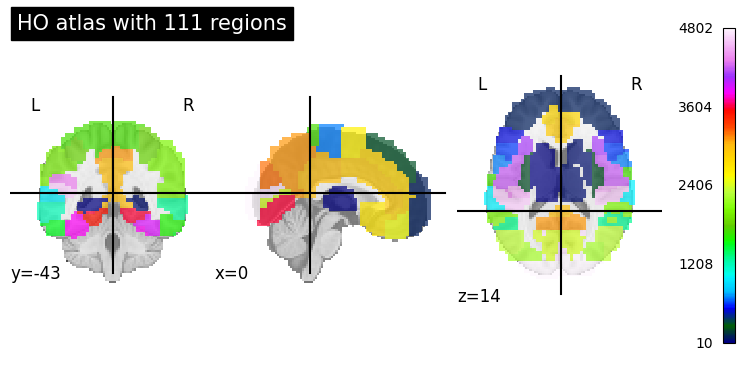

In [105]:
# Plot the atlas using nilearn.plotting
plotting.plot_roi(atlas_ho_filename,
                view_type='contours',
                # vmin=3000, 
                # # vmax=4802,
                colorbar=True,
                title='HO atlas with 111 regions')
plt.show()

In [134]:
capitalize_labels = [''.join(char for char in word if char.isupper()) for word in labels]

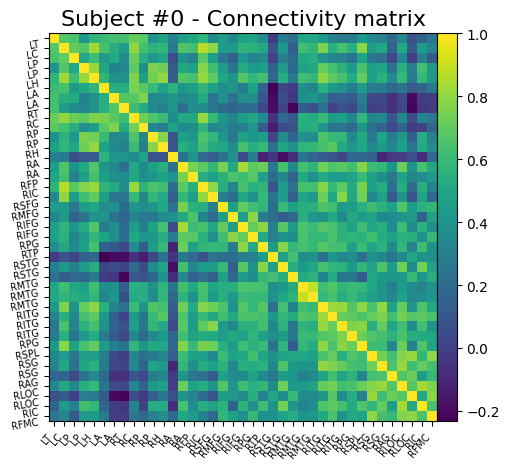

In [150]:
connectivity = data.get_connectivity_matrix(0)

fig = plt.figure()

plotting.plot_matrix(
    connectivity[1:40, 1:40],
    labels=capitalize_labels[1:40],
    cmap='viridis',
    title=f"Subject #{subject_ind} - Connectivity matrix",
    figure=fig,
)
# plt.show()

fig.savefig(path_to_figures / "ex_connectivity_matrix.png")

In [145]:
print(connectivity.shape)
connectivity[connectivity < 0.75] = 0
v, ind = connectivity.nonzero()
print(v.shape)

(111, 111)
(553,)


In [146]:
coordinates = plotting.find_parcellation_cut_coords(atlas_ho_filename)
print(coordinates.shape)

(111, 3)


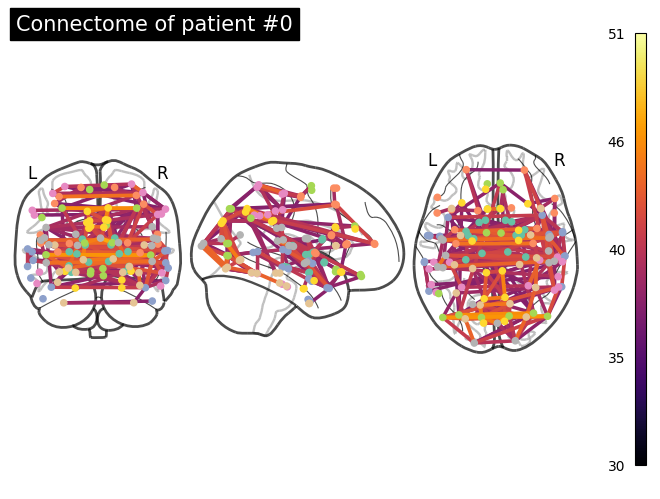

In [153]:
connectivity[connectivity < 0.75] = 0
fig = plt.figure()
plotting.plot_connectome(50*connectivity,
                         coordinates,
                         node_size=20,
                        #  black_bg=True,
                         edge_threshold=0,
                         edge_cmap="inferno",
                         colorbar=True,
                         edge_vmin=30,
                         edge_vmax=51,
                         title=f"Connectome of patient #{subject_ind}",
                         figure=fig,
                         )
plt.show()

fig.savefig(path_to_figures / "ex_brain_connectivity.png")

### Apply UMAP

In [145]:
import umap

%matplotlib inline

In [154]:
data = AbideData()
node_features = data.get_input_feature_map()
n = data.n_patients
mask_train_umap = np.random.permutation(n)

In [155]:
labels = data.get_labels()

In [170]:
redu1 = umap.UMAP(n_neighbors=20, min_dist=1, n_components=3)
embedding = redu1.fit_transform(X[mask_train_umap]) # first calls fit and then returns the transformed data as a np.ndarray

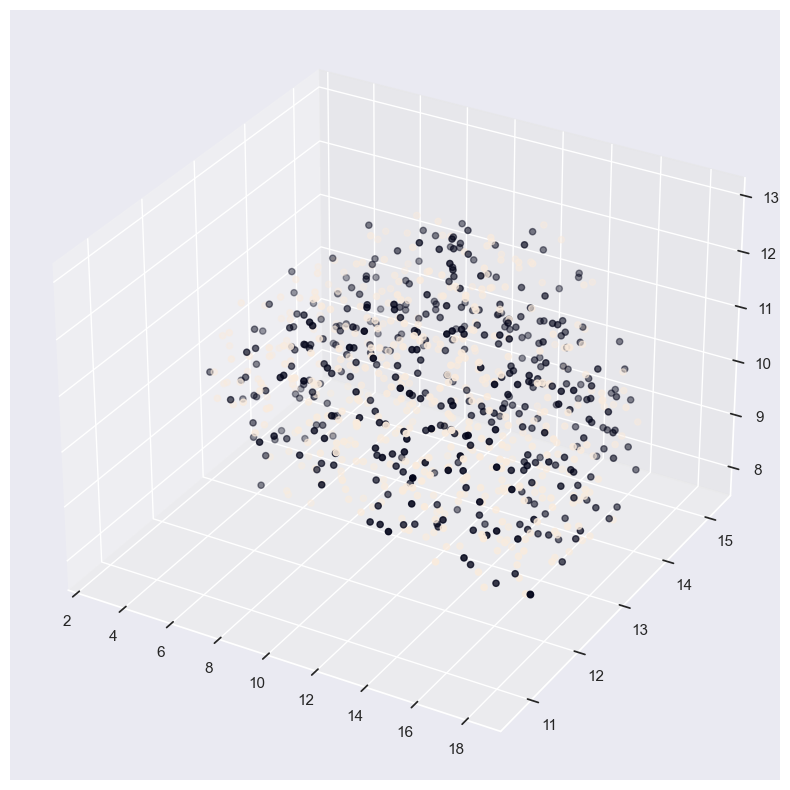

In [173]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    embedding[:, 2],
    c=labels[mask_train_umap],
)


Text(0.5, 1.0, 'UMAP projection of the features')

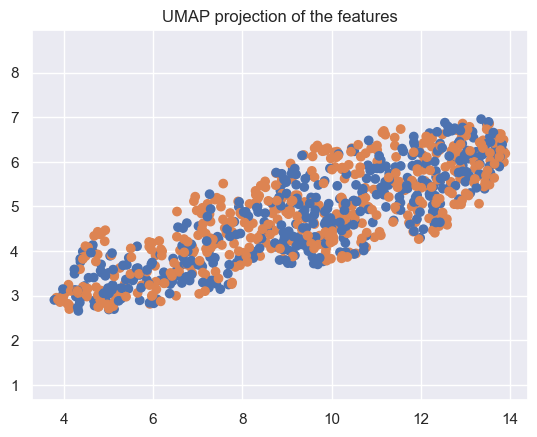

In [165]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[ sns.color_palette()[i] for i in labels[mask_train_umap]],
)
plt.gca().set_aspect("equal", "datalim")
plt.title("UMAP projection of the features")

In [161]:
mapper = reducer.fit(X, y=labels)

<Axes: >

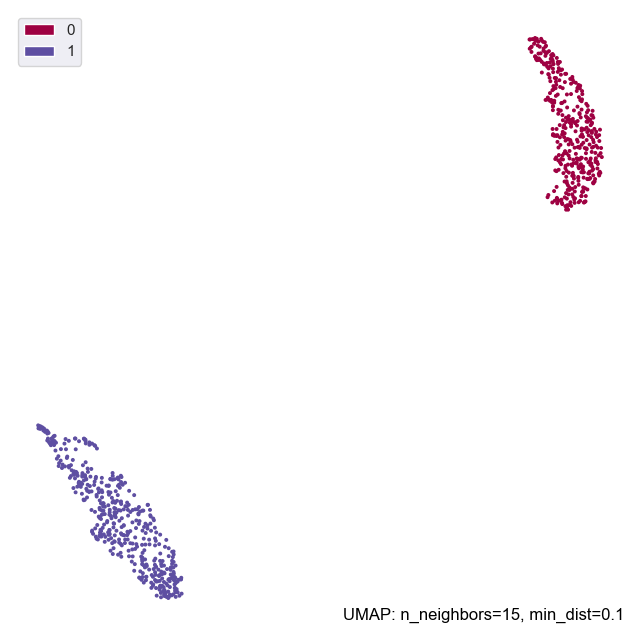

In [162]:
import umap.plot 

umap.plot.points(mapper, labels=labels)